## 1. Data Cleaning and Preprocessing

In this section, the dataset is cleaned by handling missing values,
removing irrelevant columns, encoding categorical variables,
and scaling numerical features to prepare the data for machine learning models.

In [11]:
import pandas as pd

df = pd.read_csv("Students Social Media Addiction.csv")
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [12]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [13]:
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Academic_Level,0
Country,0
Avg_Daily_Usage_Hours,0
Most_Used_Platform,0
Affects_Academic_Performance,0
Sleep_Hours_Per_Night,0
Mental_Health_Score,0


In [14]:
df = df.dropna()


In [15]:
df = df.drop("Student_ID", axis=1)

In [17]:
df = pd.get_dummies(df, drop_first=True)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_cols = [
    "Avg_Daily_Usage_Hours",
    "Sleep_Hours_Per_Night",
    "Mental_Health_Score",
    "Addicted_Score",
    "Conflicts_Over_Social_Media"
]

df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

## 2. Exploratory Data Analysis (EDA)

EDA is performed to understand relationships between social media usage,
addiction levels, sleep patterns, and mental health.

In [20]:
df.describe()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


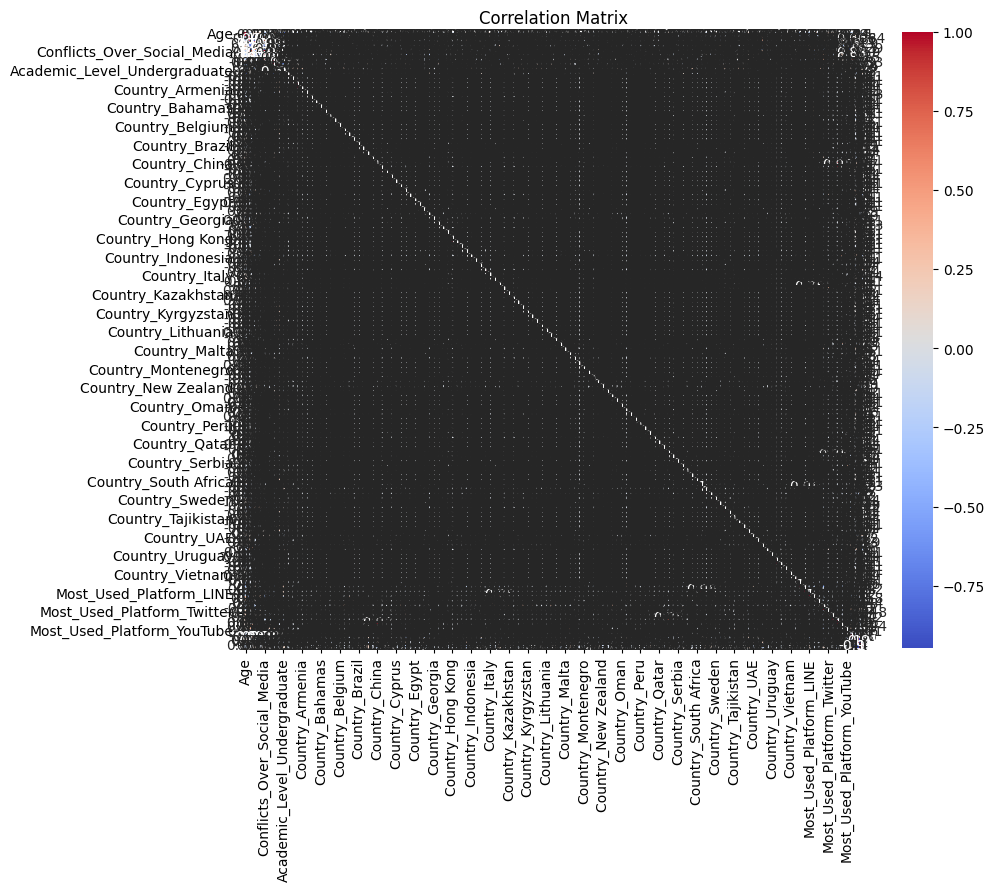

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

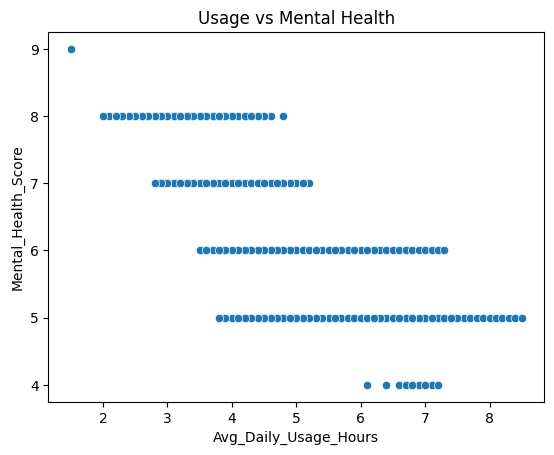

In [22]:
sns.scatterplot(
    x=df["Avg_Daily_Usage_Hours"],
    y=df["Mental_Health_Score"]
)
plt.title("Usage vs Mental Health")
plt.show()

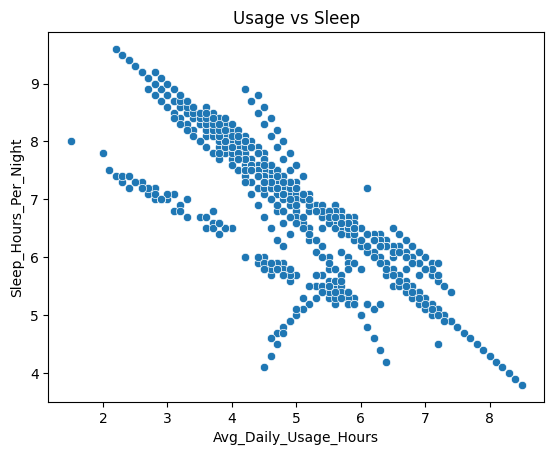

In [23]:
sns.scatterplot(
    x=df["Avg_Daily_Usage_Hours"],
    y=df["Sleep_Hours_Per_Night"]
)
plt.title("Usage vs Sleep")
plt.show()

## 3. K-Means Clustering

K-Means clustering is used to segment students into behavioral groups
based on usage intensity, addiction score, and well-being indicators.

In [25]:
features = df_scaled[[
    "Avg_Daily_Usage_Hours",
    "Sleep_Hours_Per_Night",
    "Mental_Health_Score",
    "Addicted_Score",
    "Conflicts_Over_Social_Media"
]]

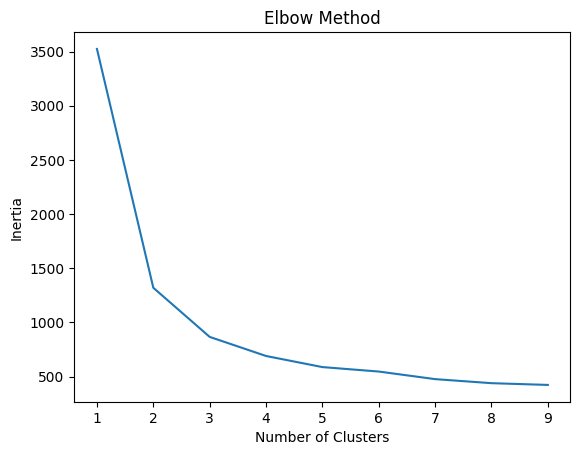

In [26]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1,10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(features)
    inertia.append(model.inertia_)

plt.plot(range(1,10), inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(features)


In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(features)

In [29]:
df.groupby("Cluster")[[
    "Avg_Daily_Usage_Hours",
    "Sleep_Hours_Per_Night",
    "Mental_Health_Score",
    "Addicted_Score"
]].mean()

,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Addicted_Score
Cluster,,,,
0,3.807836,7.832090,7.399254,4.679104
1,6.424599,5.595187,4.994652,8.251337
2,4.983200,6.789200,5.892000,6.964000


## 4. Linear Regression Model

Linear regression is used to quantify the impact of social media usage
and addiction on students' mental health scores.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df[[
    "Avg_Daily_Usage_Hours",
    "Sleep_Hours_Per_Night",
    "Addicted_Score",
    "Conflicts_Over_Social_Media"
]]

y = df["Mental_Health_Score"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))

R2 Score: 0.8937813540372149
MSE: 0.127520076547445


## 5. Business and Economic Interpretation

1. Students with higher daily usage hours and addiction scores tend to show lower mental health scores.

2. Sleep acts as a protective factor, improving well-being.

3. K-Means clustering identified three segments:
   - Balanced Users
   - High Addiction Risk Students
   - Moderate Users

4. From an economic perspective:
   - Time spent on social media represents opportunity cost.
   - High addiction reduces academic productivity (human capital impact).
   - Institutions can use segmentation for targeted intervention (risk management strategy).
   - Digital platforms can design responsible engagement models.

5. The regression model quantifies marginal impact:
   - Each additional hour of usage affects mental health score.
   - Addiction score has a significant influence on well-being.
   